# <div style="text-align:center; font-weight:bold">Loading Data Using DataLoaders</div>

### Dataset is a PyTorch primitive that store data as a collection of samples and their corresponding labels
### DataLoader is another primitive that wraps an iterable around the Dataset so you can retrive the samples easily

## Import the Required Modules

In [2]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

## 1. Loading the FashionMNIST Dataset

In [3]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST (
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

## 2. Iterating and Viewing Data in the Dataset

In [4]:
classes = training_data.classes
labels_tuple = [(i, label) for i, label in enumerate(classes)]
labels_map = dict((i, label) for i, label in labels_tuple)
labels_map

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

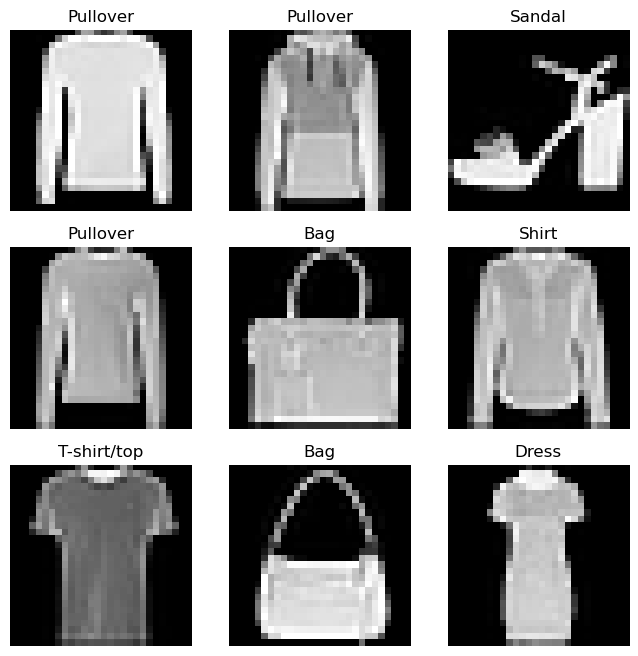

In [5]:
figure = plt.figure(figsize=(8,8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## 3. Creating Your Own Custom Dataset

In [6]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

## 4. Loading Data Using DataLoaders

In [8]:
## While training the model, 
# we pass the samples in minibatches
# reshuffle the data at every epoch to reduce overfitting
# use Pyhton's multiprocessing to speed up data retrieval
# All this are done under the hood by the use of a DataLoader which is available at torch.utils.data

from torch.utils.data import DataLoader
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: {train_labels.size()}


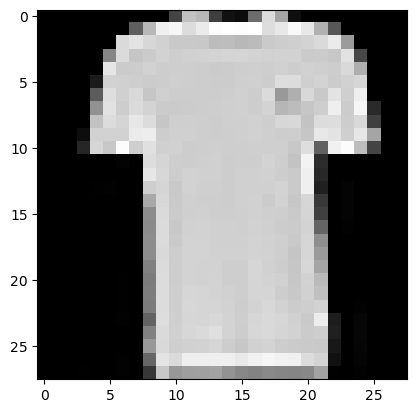

Label: 0


In [10]:
## 5. Iterating Through DataLoader
# Once we have the data laoded into the DataLoaders, we can then iterate through the dataset.
# Each itration would return a batch of train_features and train_labels
# A batch size of 64 means that the data would contain 64 samples (features and labels)
# The shuffle parameter means that the data is shuffled after each iteration over all the batches

train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print("Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]

plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")
